In [62]:
import pandas as pd
import numpy as np
import openpyxl
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import shapiro
from scipy.stats import norm
from scipy.stats import t
from matplotlib.cbook import boxplot_stats

# Estudio estadístico sobre la hipertensión

La **hipertensión** es una enfermedad que se encuentra muy presente en las preocupaciones actuales en el mundo de la sanidad. Aproximadamente, un 30% de la población adulta padece hipertensión arterial, es decir, arpoximadamente uno de cada tres. En términos clínicos, se considera hipertensión cuando la presión arterial sistólica (la “alta”) es igual o superior a 140 mmHg, y/o la presión arterial diastólica (la “baja”) es igual o superior a 90 mmHg, medidas en reposo y en varias ocasiones distintas. 

Esta enfermedad es una de las principales causas de padecer una enfermedad cardiovascular. Por este motivo, se está llevando a cabo una búsqueda para encontrar la manera de frenar este suceso.

En un laboratorio europeo se está trabajando en un medicamento innovador con cierta composición de etanol para reducir la presión arterial alta (sistólica). Para provar la efectividad de este medicamento, se provará en una muestra aleatoria (de una población donde todo individuo patece hipertensión) de 100 personas de diferentes edades. Para poder observar mejor las características de este estudio, nos resultará interesante dividir la muestra en dos subgrupos. El grupo 1, formado por pacientes con edad igual o inferior a 35 años, y el grupo 2, pacientes con edad superior a 35 años.

### Vamos a leer los datos y a guardarlos en un data frame (df)

In [63]:
data=pd.read_excel("HIPERTENSION.xlsx", engine='openpyxl')  # Este comando nos lee el excel y lo guarda en un df
data.head() #Este comando nos enseña las 5 primeras filas del df

,Grupo,Edad,Presion sistólica antes,Presión sistólica después,Colesterol total
0,1,30,126,118,191
1,1,25,114,110,181
2,1,27,110,110,175
3,1,34,108,105,173
4,1,35,131,132,200


Podemos observar que el data frame está compuesto por 5 variables. La primera, "Grupo" nos dice si el paciente forma parte del grupo 1 o del grupo 2, dependiendo de su edad. La segunda variable, "Edad", nos informa de la edad de cada paciente. La tercera y cuarta variables corresponden al valor de la presión sintólica antes y después de tomar la dosis. Finalmente, la variable "Colesterol total", que nos indica la cantidad de colesterol en sangre que tiene cada paciente.

# Ahora guardaremos los dos subgrupos en dos df diferentes

In [64]:
grupo_1=data[data['Grupo']==1] #Filtramos por el el valor de la variable "Grupo" para que tengan el valor 1
grupo_2=data[data['Grupo']==2] #Filtramos por el el valor de la variable "Grupo" para que tengan el valor 2
print(f'El grupo 1 consta de {len(grupo_1)} individuos y el grupo 2 de {len(grupo_2)} individuos.')

El grupo 1 consta de 40 individuos y el grupo 2 de 60 individuos.


Una vez tenemos estos dos grupos diferenciados, nos puede resultar interesante calcular sus medidas de centralización y de dispersión:

In [65]:
print("Las medidas de centralización de la variable 'Presión sistólica antes' son las siguientes:")
print(f" -La media de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].mean(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].mean(),3)}.")
print(f" -La mediana de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].median(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].median(),3)}.")
print(f" -La moda de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].mode()[0],3)}, la tienen {len(grupo_1[grupo_1['Presion sistólica antes']==121])} individuos. Para el grupo 2 es {round(grupo_2['Presion sistólica antes'].mode()[0],3)}, la tienen {len(grupo_2[grupo_2['Presion sistólica antes']==121])} individuos.")
##############
print("Las medidas de dispersión de la variable 'Presión sistólica antes' son las siguientes:")
print(f" -La varianza de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].var(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].var(),3)}.")
print(f" -La desviación típica de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].std(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].std(),3)}.")
print(f" -El rango de esta variable para el grupo 1 es {round(grupo_1['Presion sistólica antes'].max() - grupo_1['Presion sistólica antes'].min(),3)} y para el grupo 2 es {round(grupo_2['Presion sistólica antes'].max() - grupo_2['Presion sistólica antes'].min(),3)}.")

Las medidas de centralización de la variable 'Presión sistólica antes' son las siguientes:
 -La media de esta variable para el grupo 1 es 123.425 y para el grupo 2 es 127.483.
 -La mediana de esta variable para el grupo 1 es 124.5 y para el grupo 2 es 126.0.
 -La moda de esta variable para el grupo 1 es 121, la tienen 3 individuos. Para el grupo 2 es 121, la tienen 7 individuos.
Las medidas de dispersión de la variable 'Presión sistólica antes' son las siguientes:
 -La varianza de esta variable para el grupo 1 es 81.481 y para el grupo 2 es 192.898.
 -La desviación típica de esta variable para el grupo 1 es 9.027 y para el grupo 2 es 13.889.
 -El rango de esta variable para el grupo 1 es 37 y para el grupo 2 es 58.


Aquí podemos observar que el grupo 1 esta centrados en un punto un poco más bajo que el grupo 2 (la media son 4 puntos menos en el grupo 1 que en el grupo 2, y la mediana 1.5). Aunque la moda en ambos grupos es la misma, en el grupo 1 aparece 3 veces y en el grupo 2, 7 veces (cierto es también que el grupo 2 está formado por 20 pacientes más que el grupo 1).

Donde si observamos un cambio más significativo es cuando hablamos de como se dispersan los datos. Podemos observar que la varianza en el grupo 2 es más del doble que la varianza en el grupo 1. También observamos que el rango de valores en el grupo 2 es más amplio que en el grupo 1. 

Para observar esto último, lo veremos más claro con un gráfico de dispersión.

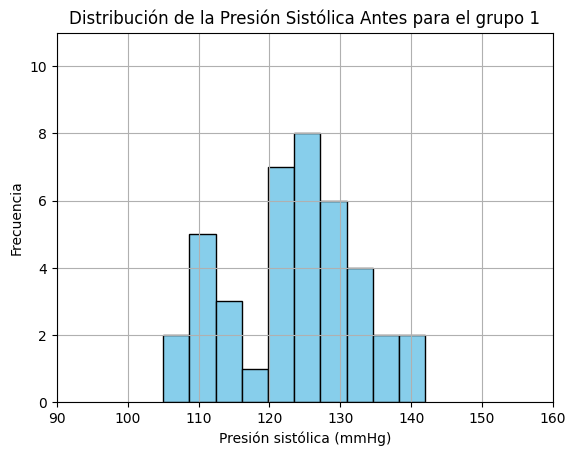

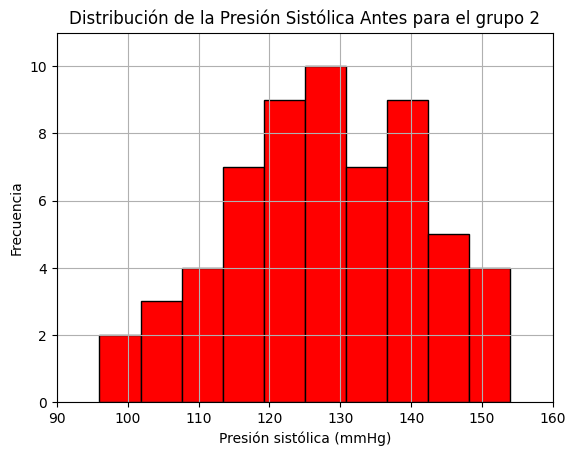

In [66]:
#Histograma para el grupo 1
plt.hist(grupo_1["Presion sistólica antes"], bins=10, color='skyblue', edgecolor='black')
plt.xlim(90, 160) #Adjudicaremos el mismo rango de valores para el eje X y eje Y
plt.ylim(0,11)
plt.title("Distribución de la Presión Sistólica Antes para el grupo 1")
plt.xlabel("Presión sistólica (mmHg)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()
#Histograma para el grupo 2
plt.hist(grupo_2["Presion sistólica antes"], bins=10, color='red', edgecolor='black')
plt.xlim(90, 160)
plt.ylim(0,11)
plt.title("Distribución de la Presión Sistólica Antes para el grupo 2")
plt.xlabel("Presión sistólica (mmHg)")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()

Aquí podemos observar que la presión sistólica, antes de tomar el medicamento, está distribuida de manera más amplia en el grupo 2 que en el grupo 1. Esto es un buen indicio de por qué hemos separado los datos en dos grupos: permite mejorar la calidad del análisis y obtener conclusiones más detalladas.

OJO: En el histograma del grupo 2, las frecuencias son más altas que en el histograma del grupo 1. Esto es debido a que el grupo 2 esá compuesto por 20 pacientes más que el grupo 1.

#### Coeficiente de variación ($CV$)

Para ver si la media de ambos gruos es representativa, calcularemos el coeficiente de variación, $CV=\frac{s}{\bar{x}}$, de ambos grupos. Si este es menor de $0.3$, podemos considerar que la media es representativa.

In [67]:
print(f"El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 1 es {round(grupo_1['Presion sistólica antes'].std()/grupo_1['Presion sistólica antes'].mean(),3)}")
print(f"El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 2 es {round(grupo_2['Presion sistólica antes'].std()/grupo_2['Presion sistólica antes'].mean(),3)}")

El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 1 es 0.073
El coeficiente de variación para de la variable 'Presión sistólica antes' del grupo 2 es 0.109


Cuando menor sea $\lvert CV \rvert$, más representativa será la media. Diremos que si $\lvert CV \rvert \in (0,0.1)$, tendremos muy buena representatividad; la media refleja muy bien los datos. Si $\lvert CV \rvert \in [0.1,0.2]$ tendremos una representatividad aceptable; la media es útil con precaución. En cambio, si $\lvert CV \rvert \in (0.2,\infty)$ tenemos una representatividad baja; la media puede no reflejar adecuadamente los datos.

En nuestro ejercicio, la media del grupo 1 resulta muy representativa, mientras que la del grupo 2 también es bastante representativa, aunque ligeramente menos que la del grupo 1.

#### Simetría i curtosis

Nos puede resultar interesante estudiar la curtosis y la simetría de nuestros datos, concretamente nos fijaremos en el grupo 2. Para calcular la *skewness measure* ($g_1$) lo podemos hacer definiendo una función que nos calcule la expresión del coeficiente, o también, `pandas` ya tiene la función `skew()` implementada. 

Para $g_1<0$, a medida que el valor de $\lvert g_1 \rvert$ augmenta, la distribución es más sesgada a la izquierda, es decir, que la cola larga está en la izquierda. Para $g_1>0$, a medida que el valor de este va augmentando, la distribución es más sesgada a la derecha y la cola larga será la de la derecha. Por último, si $g_1\in (-\varepsilon,\varepsilon)$ para $\varepsilon \rightarrow 0$, la distribución será aproximadamente simétrica

In [68]:
print(f"El coeficiente g_1 para la variable 'Presion sistólica antes' del grupo 2 vale {round(grupo_2['Presion sistólica antes'].skew(),3)}.")
print(f"El coeficiente g_1 para el grupo 2 vale {round(grupo_2['Presión sistólica después'].skew(),3)}.")

El coeficiente g_1 para la variable 'Presion sistólica antes' del grupo 2 vale -0.137.
El coeficiente g_1 para el grupo 2 vale -0.194.


Este resultado nos dice que la variable "Presion sistólica antes" está distribuida de manera bastante simétrica, ligeramente asimétrica negativa. Al observar su respectivo histograma (de color rojo), podemo comprovar gráficamente este resultado.

Ahora, nos podríamos plantear calcular el coeficiente de Pearson. La cosa es que este coeficiente solo nos será significativo si la distribución es campaniformes, y nuestra distribución no lo es (como podemos observar en el respectivo histograma).

En conclusión, la variable 'Presión sistólica antes' presenta una ligera asimetría negativa (cola larga a la izquierda).

Ahora, calcularemos la *curtosis* de esta misma variable, una medida que nos indicará forma de su distribución de frecuencias.

Por definición, la curtosis es un valor positivo y cuando este tiene un valor aproximado a 3, la curva tiene cola y pico normales (distribución normal). A medida que la curtosis va tendiendo a $0$, la distribución va cogiendo un pico más alto y colas más gruesas, haciendo así que la media sea representativa y la presencia de outliers sea escasa. En cambio, si la curtosis va augmentando de valor, tendrá un pico más alto y colas más finias, haciendo que la media sea menos representativa por la presencia de outliers.

In [69]:
print(f'La curtosis de la variable "Presion sistólica antes" del grupo 2 vale {round(grupo_2["Presion sistólica antes"].kurtosis()+3,3)}.')
print(f'La curtosis de la variable "Presión sistólica después" del grupo 2 vale {round(grupo_2["Presión sistólica después"].kurtosis()+3,3)}.')

La curtosis de la variable "Presion sistólica antes" del grupo 2 vale 2.398.
La curtosis de la variable "Presión sistólica después" del grupo 2 vale 3.369.


Por el resultado de la curtosis, 2.4, nos indica que la distribución tendrá el pico un poco más alto y con colas más gruesas que la distribución normal. 

Para ver más claro lo comentado anteriormente, trazaremos la curva de la distribución normal $N(127.483, 13.889)$

# AFEGIR DESPUÉS

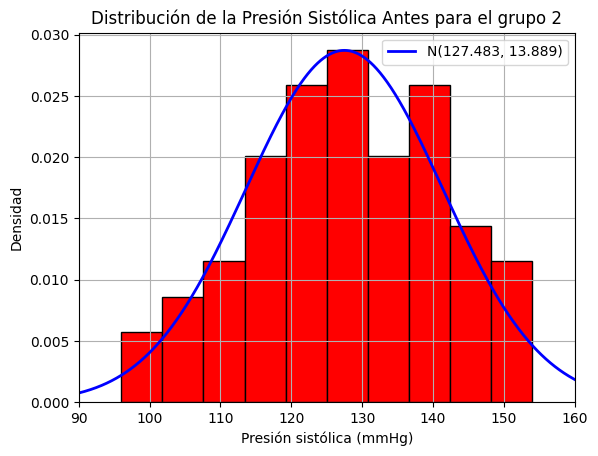

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

# Parámetros de la distribución normal deseada
media = 127.483
desv = 13.889

# Histograma de tus datos reales
plt.hist(grupo_2["Presion sistólica antes"], bins=10, color='red', edgecolor='black', density=True)
plt.xlim(90, 160)
plt.title("Distribución de la Presión Sistólica Antes para el grupo 2")
plt.xlabel("Presión sistólica (mmHg)")
plt.ylabel("Densidad")  # usamos densidad para comparar con la curva normal
plt.grid(True)

# Curva normal teórica centrada en la media y desviación dadas
x = np.linspace(90, 160, 1000)
y = norm.pdf(x, media, desv)

# Añadimos la curva al mismo gráfico
plt.plot(x, y, 'b', linewidth=2, label=f'N({media:.3f}, {desv:.3f})')

plt.legend()
plt.show()



Podemos comprovar en el gráfico todo lo comentado sobre la asimetría y la curtosis. Observamos que el nuestra distribución tiene las colas más gruesas que la normal (las barras están por encima de la curva). No obstante el pico sí coincide con el de la distribución normal, eso puede pasar ya que nuestra curtosis tampoco está muy alejado del valor normal (3). 

También observamos esa ligera asimetría negativa al compararla con la simetria de la distribución normal.

#### Variables relacionadas con la presión sistólica

En nuestro data frame tenemos LAS variables a parte de la 'Presion sistólica antes' y 'Presió sistólica después' que nos indican el nivel de esta antes y después de la toma de medicameento. Para conocer más de estás variables, calcularemos sus cuartiles, es decir, si ordenamos estas variables de menor a mayor, que valor nos encontraríamos si recorriéramos estas variables en orden al 25% (Q1), 50% (Q2 o mediana) y 75% (Q3). Estos valores, los podemos calcular mirando las frecuencias absolutas mirando en que valor nos encontramos en las posiciones 25%, el 50% y el 75% de la longitud de la muestra, o también y de manera más eficaz, a partir de la función de python `percentile()` del paquet `numpy`.

In [71]:
#Presión sistólica después de la toma
q1 = np.percentile(data['Presion sistólica antes'], 25)
q2 = np.percentile(data['Presion sistólica antes'], 50)  
q3 = np.percentile(data['Presion sistólica antes'], 75)
q_antes=[q1,q2,q3]
#Presión sistólica después de la toma
q1_d = np.percentile(data['Presión sistólica después'], 25)
q2_d =np.percentile(data['Presión sistólica después'], 50)
q3_d = np.percentile(data['Presión sistólica después'], 75)
q_desp=[q1_d,q2_d,q3_d]
#Montamos data frame
df_quartiles = pd.DataFrame({
    'Presión sistólica antes': q_antes,
    'Presión sistólica después': q_desp
}, index=['Q1 (25%)', 'Q2 (50%)', 'Q3 (75%)'])

print(df_quartiles)



          Presión sistólica antes  Presión sistólica después
Q1 (25%)                    118.0                     115.00
Q2 (50%)                    125.0                     120.00
Q3 (75%)                    135.0                     131.25


Aquío podemos ver que los valores de la presión sistólica antes de la toma del médicamente, son ligeramente superiores a los de despúes de la toma. Para ver todavía más las diferencias entre ambos grupos de pacientes, graficaremos el boxplot, también conocido como gráfico de bigotes, el cual consiste en un rectángulo, cuyas bases se encuentran el los valores Q1 y Q3 en el eje Y, luego este rectángulo tiene un segmento rojo en medio, el cual se encuentra en el valor Q2 del eje Y. Es decir, en esta caja se agrupa el 50% de los datos de la observación, del 25% al 75%. El amplitud de la caja es el rango intercuartílico (Q3-Q1).

Finalmente,de estos rectángulos salen dos bigotes que se alargan del extremo de la caja hasta los valores más pequeños (resp. más grandes) hasta que no son considerados atípicos. Los valores que determinan los extremos del bigote son
- El límite inferior es el primer valor que es mayor que $Q1-1.5\cdot \text{IQR}$
- El límite superior es el último valor que es menor que $Q3+1.5\cdot \text{IQR}$

En nuestra observación, para para los niveles de presión sistólica antes de la toma, el rango intercuartílico es $\text{IQR}_a=17$, y para después de la toma es $\text{IQR}_d=16.25$

/var/folders/bq/b40j21hx6tq860nwpz396pjw0000gn/T/ipykernel_4692/4229722796.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(


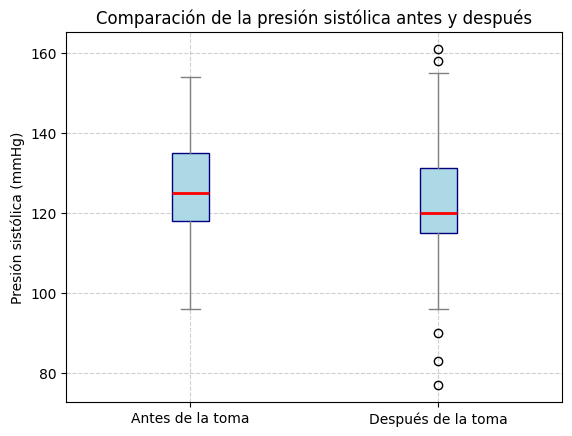

In [72]:
plt.boxplot(
    [data['Presion sistólica antes'], data['Presión sistólica después']],
    labels=['Antes de la toma', 'Después de la toma'],
    patch_artist=True,  # Relleno de color
    boxprops=dict(facecolor='lightblue', color='navy'),
    medianprops=dict(color='red', linewidth=2),
    whiskerprops=dict(color='gray'),
    capprops=dict(color='gray'),
    flierprops=dict(marker='o', color='orange', markersize=6)
)


# Título y etiquetas
plt.title('Comparación de la presión sistólica antes y después', fontsize=12)
plt.ylabel('Presión sistólica (mmHg)')
plt.grid(True, linestyle='--', alpha=0.6)

plt.show()

Del gráfico ya podemos observar lo comentado anteriormente, que los niveles de presión sistólica son más altos antes de tomar la toma que después de tomar la toma. Para ser lo más precisos, utilizaremos del paquete de `matplotlib` la función `boxplot_stats`. De aquí obtendremos los cuatiles, los extremos de los bigotes y los valores de las observaciones atípicas (*outliers*).

In [73]:
stats = boxplot_stats([
    data['Presion sistólica antes'],
    data['Presión sistólica después']
]) #Esta función nos devuelve una lista de dos diccionarios, uno para cada variable, con diferentes medidas estadísticas.

for i, grupo in enumerate(stats):  #Con el enumerate iteramos sobre la lista y a la vez obteemos el elemento (los diccionarios). 
    print(f" -Grupo {i+1}: {'Antes de la toma' if i==0 else 'Después de la toma'}")
    print(f"  Q1 (25%): {grupo['q1']}")
    print(f"  Mediana (Q2): {grupo['med']}")
    print(f"  Q3 (75%): {grupo['q3']}")
    print(f"  Límite inferior (whislo): {grupo['whislo']}")
    print(f"  Límite superior (whishi): {grupo['whishi']}")
    print(f"  Outliers: {grupo['fliers']}")

 -Grupo 1: Antes de la toma
  Q1 (25%): 118.0
  Mediana (Q2): 125.0
  Q3 (75%): 135.0
  Límite inferior (whislo): 96
  Límite superior (whishi): 154
  Outliers: []
 -Grupo 2: Después de la toma
  Q1 (25%): 115.0
  Mediana (Q2): 120.0
  Q3 (75%): 131.25
  Límite inferior (whislo): 96
  Límite superior (whishi): 155
  Outliers: [ 83  90  77 158 161]


Vemos que después de la toma tenemos *outliers* en los valores de presión sistólica, así como antes no teníamos. Tenemos 3 pacientes que la tienen muy baja (83, 90 y 77 mm de Hg) y 2 que la tienen muy alta (158 y 161 mm de Hg) en comparación a la muestra.

#### Normalidad de los datos

Para futuros estudios, como la inferencia, nos puede resultar muy interesante comprobar si las variables se distribuyen de maner normal. Para verificar lo comentado lo haremos a partir de un contraste de hipótesis, llamado *Shapiro-Wilk test*, dónde la hipótesis nula, $H_0$ es que los datos siguen una distribución es nromal, y la hipótesis alternativa $H_1$ es que la distribución no sigue una distribución normal. Este contraste lo realizaremos a través de la función `shapiro()` del paquete `scipy`. 

Esta función, nos da el $p$-valores del contraste de hipótesis. Si $p>\alpha$, donde $\alpha$ es el nivel de significancia, entonces no se rechaza $H_0$ y los datos seguirán una distribución normal. En cambio, si $p<\alpha$ se rechazará la hipótesis nula y aceptamos $H_1$, entonces diremos que los datos no siguen uns distribución normal.

Nosotros trabajaremos con $\alpha=0.05$ i con $\alpha=0.01$, es decir, con una confianza del $95\%$ i del $99\%$ respectivamente.

In [74]:
stat_psa, p_value_psa = shapiro(data['Presion sistólica antes'])
stat_psd, p_value_psd = shapiro(data['Presión sistólica después'])
print(f'El p-valor para la variable Presion sistólica antes es {p_value_psa}')
print(f'El p-valor para la variable Presión sistólica después es {p_value_psd}')

El p-valor para la variable Presion sistólica antes es 0.8156294109699813
El p-valor para la variable Presión sistólica después es 0.10874561600201343


Vistos los $p$-valores que nos ha dado el *Shapiro-Wilk test*, podemos ver las mismas conclusiones para $\alpha=0.05$ y $\alpha=0.01$. Podemos deducir que las variables de presión sistólica siguen una distribución normal, ya que los $p$-valores respectivos son mayores que los $\alpha$'s definidos.

## Relaciones entre variables.

De nuestro estudio, un resultado que nos puede resultar muy interesante es estudiar la relación que tendrián la presión sistólica después de que los pacientes jóvenes (grupo 1) tomen el médicamento, con el nivel de colesterol que tienen estos. Así podremos ver como puede haber afectado la toma del medicamento al nivel de colesterol a los pacientes.

Una medida que nos pueden ayudar a entender la relación de estas variables són la covarianza y la corelación. Para esto, utilizaremos el comando `.cov()` del paquete  `pandas`, el cual nos va a devolver una matriz $2 \times 2$, donde los elementos $a_{ii}$ para $i\in \{1,2\}$ són las varianzas de las variables y los elementos $a_{ij}$ para $i\neq j$ son las covarianzas entre las dos variables. Notemos que será una matriz simétrica.

In [75]:
print(f"La matriz de covarianzas es {grupo_1.cov().loc[['Presión sistólica después', 'Colesterol total'],['Presión sistólica después', 'Colesterol total']]}")

La matriz de covarianzas es                            Presión sistólica después  Colesterol total
Presión sistólica después                  87.117949         81.515385
Colesterol total                           81.515385        136.153205


Por lo tanto, tenemos que la covarianza entre estás dos variables vale $81.515$. Vemos que es positiva, por lo tanto sabemos que tendrá una relación directa. Para saber en más precisión, hasta que punto esta relación es significativa o no, calcularemos el coeficiente de correlación ($\rho$). Este toma un valor dentro del intervalo $(-1,1)$, si este vale $0$ quiere decir que no hay relación ninguna entre las dos variables; si es negativo, cuando más tienda a $-1$, más tendencia lineal con pendiente negativa tendrá; si es positivo, cuando más tienda a $1$, más tendencia lineal con pendiente positiva tendrá. 

De igual manera que anteriormente, calcularemos la matriz de correlación gracias a la función `.cor()` del paquete `pandas` el cual nos va a devolver una matriz $2 \times 2$, donde los elementos $a_{ii}=1$ para $i\in \{1,2\}$ ya que la si dos variables són las mismas, la relación sería lineal (recta identidad) y los elementos $a_{ij}$ para $i\neq j$ son los coeficientes de correlación entre las dos variables. Notemos que será una matriz simétrica.

In [76]:
print(f"La matriz de correlaciones es {grupo_1.corr().loc[['Presión sistólica después', 'Colesterol total'],['Presión sistólica después', 'Colesterol total']]}")

La matriz de correlaciones es                            Presión sistólica después  Colesterol total
Presión sistólica después                   1.000000          0.748466
Colesterol total                            0.748466          1.000000


Podemos observar que el coeficiente de correlación entre las dos variables es suficientemente alto ($\rho=0.745$) para considerar que hay una significante relación directa. Para ver más clara esta relación, veamos el gráfico de dispersión entre las dos variables.

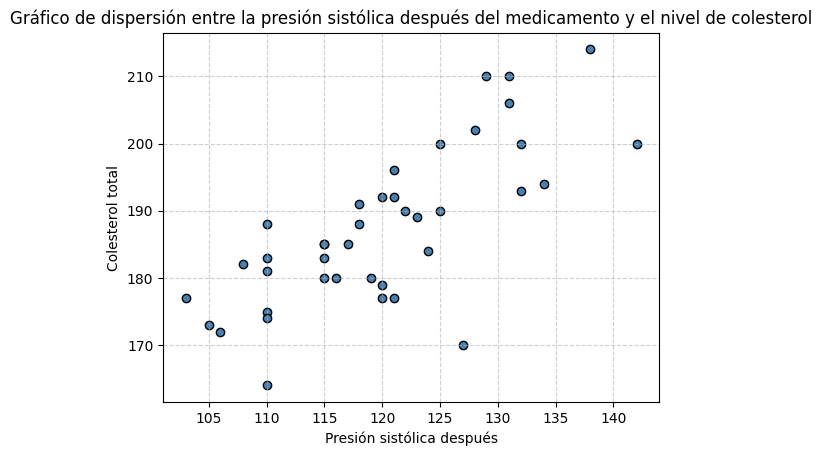

In [77]:
plt.scatter(grupo_1['Presión sistólica después'], grupo_1['Colesterol total'], color='steelblue', edgecolor='black')
plt.title('Gráfico de dispersión entre la presión sistólica después del medicamento y el nivel de colesterol')
plt.xlabel('Presión sistólica después')
plt.ylabel('Colesterol total')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

En efecto se observa esa relación directa en el gráfico de dispersión. Cierto es que tenemos algún *outlier*, como cuando el nivel de colesterol es 164mg/dL y ya presión sistólica es 110mmHg, o cuando el colesterol vale 170mg/dL y la presión sistólica 127mmHg, pero en general sigue, aproximadamente, una tendencia lineal.

#### Modelo de regresión lineal

Una vez que hemos vista que exista una relación directa suficientemente fuerte entre las dos variables, nos puede resultar muy útil para nuestro estudio estadístico modelar una ecuación de regresión lineal. Existen varias maneras de construirlas, pero la más completa es el modelo `OLS` del paquete `statsmodels`. Veámoslo.

In [78]:
X = sm.add_constant(grupo_1['Colesterol total'])  
Y = grupo_1['Presión sistólica después']
modelo = sm.OLS(Y, X).fit()
print(modelo.summary())

                                OLS Regression Results                               
Dep. Variable:     Presión sistólica después   R-squared:                       0.560
Model:                                   OLS   Adj. R-squared:                  0.549
Method:                        Least Squares   F-statistic:                     48.40
Date:                       Thu, 23 Oct 2025   Prob (F-statistic):           2.81e-08
Time:                               16:26:55   Log-Likelihood:                -129.17
No. Observations:                         40   AIC:                             262.3
Df Residuals:                             38   BIC:                             265.7
Df Model:                                  1                                         
Covariance Type:                   nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------

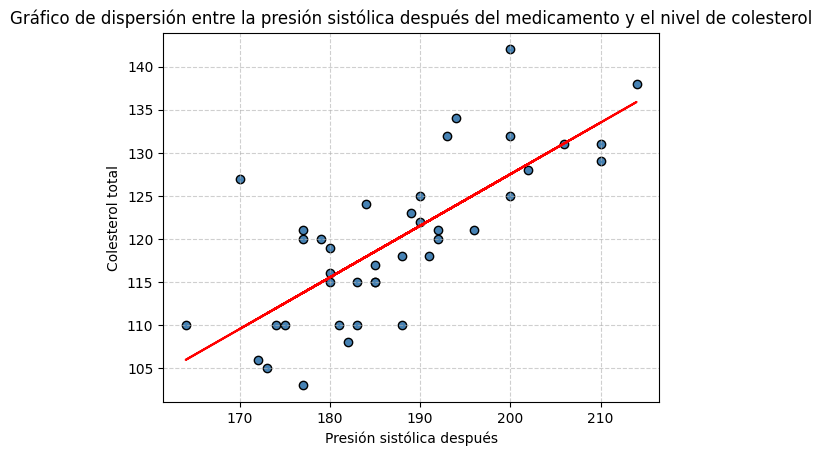

In [79]:
Y_pred = modelo.predict(X)
plt.scatter(grupo_1['Colesterol total'],grupo_1['Presión sistólica después'], color='steelblue', edgecolor='black')
plt.plot(grupo_1['Colesterol total'], Y_pred, color="red", label="Recta de regresión")
plt.title('Gráfico de dispersión entre la presión sistólica después del medicamento y el nivel de colesterol')
plt.xlabel('Presión sistólica después')
plt.ylabel('Colesterol total')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

En este gráfico podemos observar la traza de la recta de regresión lineal juntamente con el gráfico de dispersión. De esta manera podemos tener una primera impresión del nivel de ajuste que tiene este modelo de regresión.

Este modelo tiene un $R^2$ de 0.56, eso explica que se explica un 56% de la variabilidad de la presión sistólica después de tomar el medicamento en función del colesterol total. El $R^2$ ajustado es prácticamente igual, ya que se trata de un modelo de regresión lineal simple. En un modelo de regresión lineal multivariable el $R^2$ ajustado será el coeficiente que tendremos que observar para deducir si el modelo está bien ajustado o no, ya que este se construye dependiendo del número de variables en el modelo. Entonces, ese 34% que no queda explicado por este modelo, lo podríamos mejorar poniendo más variables (que esten relacionadas con la presión sistólica después) en el modelo de regresión lineal.

 La ecuación de la recta será $$y=0.5987x+7.7778$$
 Con esta podemos hacer una estimación del nivel de presión sistólica después del medicamente a partir del nivel de colesterol. Por ejemplo, si un paciente joven tiene un nivel de colesterol de 105mg/Dl, la estimación de la presión sitólica será $y=0.5987*105+7.7778=70.6413$.

 Es decir, dado un valor $c$ de colesterol, la estimación del valor de presión sistólica después de tomar el medicamento por el modelo de regresión lineal será $p=0.5987*c+7.7778$

# REVISAR

Para ver todavía de manera más clara la funcionalidad de regresión lineal, podemos estimar que pasaría a su presión sistólica después del medicamente si a un paciente se le suma 5mg/Dl de colesterol. Esto quedaría así
$$p=0.5987(c+5)+7.7778=0.5987c+10.7713$$

## Inferencia sobre nuestros datos

A partir de los datos que tenemos, podemos hacer inferencia en ellos. Esto significa que podemos utilizar las muestras disponibles para extraer conclusiones sobre la población de la que proceden. Mediante el uso de técnicas estadísticas, como intervalos de confianza o contrastes de hipótesis, es posible estimar parámetros poblacionales y evaluar la evidencia a favor o en contra de determinadas suposiciones. 

Hemos visto anteriormente que los datos de "Presion sistólica antes" siguen una distribución normal, pero como ahora trabajamos con subconjuntos de los datos originales, así que volveremos a hacer el *Shapiro-Wilk test* para la variable 'Presion sistólica antes' y 'Presión sistólica después' en estos subconjuntos de los datos. 

In [80]:
stat2_psa, p2_value_psa = shapiro(grupo_2['Presion sistólica antes'])
stat2_psd, p2_value_psd = shapiro(grupo_2['Presión sistólica después'])
stat1_psa, p1_value_psa = shapiro(grupo_1['Presion sistólica antes'])
stat1_psd, p1_value_psd = shapiro(grupo_1['Presión sistólica después'])
print(f'El p-valor para la variable Presion sistólica antes en el grupo 2 es {p2_value_psa}')
print(f'El p-valor para la variable Presion sistólica después en el grupo 2 es {p2_value_psd}')
print(f'El p-valor para la variable Presion sistólica antes en el grupo 1 es {p1_value_psa}')
print(f'El p-valor para la variable Presion sistólica después en el grupo 1 es {p1_value_psd}')



El p-valor para la variable Presion sistólica antes en el grupo 2 es 0.4800773973337415
El p-valor para la variable Presion sistólica después en el grupo 2 es 0.45458923844741383
El p-valor para la variable Presion sistólica antes en el grupo 1 es 0.5499224176040686
El p-valor para la variable Presion sistólica después en el grupo 1 es 0.6403428279804488


Como vemos, $p$-valor $>\alpha_i$ para $i \in \{1,2\}$, así que aceptamos la hipótesis nula, es decir, las variable siguen una distribución normal. Realmente, como trabajaremos con muestras de mida grande ($n>30$), no haría falta comprovar esto último por el Teorema del Límite Central.

 Una variable que nos puede resultar muy interesante estudiar es la "Presion sistólica antes" para el grupo de personas más adultas, es decir, el grupo 2. La inferencia que querremos hacer es para conocer el valor de la media poblacional de esta variable. El objetivo sería para ver media en el momento de la ingestión de la población adulta (grupo 2) es 130 mm de Hg. Lo haremos con $\alpha=0.05$ y $\alpha=0.01$



Ahora, para calcular los intervalos de confianza, utilizaremos esta proposición

**Proposición.** Sea $x_1, \ldots, x_n$ una m.a.s. de una variable aleatoria $X$ con distribución 
$N(\mu, \sigma^2)$, con $\mu$ y $\sigma^2$ desconocidas. Entonces

$$
L_1 = \bar{X} - t_{n-1,\,1-\alpha/2} \cdot \frac{\tilde{S}}{\sqrt{n}}
$$
$$
L_2 = \bar{X} + t_{n-1,\,1-\alpha/2} \cdot \frac{\tilde{S}}{\sqrt{n}},
$$

forman un intervalo de confianza del $100(1-\alpha)\%$ para $\mu$.

Entonces, vayamos a calcular el intervalo de confianza para los $\alpha_i$'s. Los cuantiles para la $t$-student, los calculamos con la función `t.ppf()` del paquete `scipy`. 

In [81]:
x_bar=grupo_2['Presion sistólica antes'].mean()
s=grupo_2['Presion sistólica antes'].std()
n=len(grupo_2['Presion sistólica antes'])
alpha_1=0.05
alpha_2=0.01
t_student_1=t.ppf(1 - alpha_1/2, n-1)
t_student_2=t.ppf(1 - alpha_2/2, n-1)
print(f'El intervalo de confianza para alpha=0.05 es ({x_bar-t_student_1*(s/np.sqrt(n))},{x_bar+t_student_1*(s/np.sqrt(n))})')
print(f'El intervalo de confianza para alpha=0.01 es ({x_bar-t_student_2*(s/np.sqrt(n))},{x_bar+t_student_2*(s/np.sqrt(n))})')

El intervalo de confianza para alpha=0.05 es (123.89548275261333,131.07118391405334)
El intervalo de confianza para alpha=0.01 es (122.71071227220504,132.2559543944616)


Como nos podíamos esperar, cuanto más nivel de confianza, más amplio es el rango del intervalo.

Ahora, para resolver la cuestión de si podemos admitir que la presión sistólica media ($\mu$) en el momento de la ingestión de la población adulta (grupo 2) es 130 mm de Hg. Para estudiar este caso, realizaremos el siguiente contraste de hipótesis:
$$ \left\{\begin{matrix}
H_0: & \mu=130 \\
H_1: & \mu \neq 130, \\
\end{matrix}\right.$$

Para resolver este contraste, lo que haremos va a ser calcular nuestro estadístico, que en este caso es $t=\frac{\bar{x}-\mu_0}{\frac{\tilde{s}}{\sqrt{n}}}$, donde $\mu_0$ es la media propuesta en la hipótesis nula, $\bar{x}$ la media mostral y $\tilde{s}$ la desviación típica muestral. 

Al ser un test bilateral, tenemos que comprovar que si $-|t_{crítico}|<t<|t_{crítico}|$, donde $t_{critico}=t_{\frac{\alpha}{2},n-1}$. Esto útltimo viene de que $(T/H_0)\sim t_{\alpha,n-1}$. Notemos que en el $t_{critico}$ está definido con $\frac{\alpha}{2}$, esto es consecuencia directa de la bilateralidad y de la simetría de la distribución $t$-student.

Aceptamos la hipótesis nula $H_0$ si se cumple lo comentado anterioremnte, sinó la rechazamos y aceptamos la hipótesis alternativa $H_1$.

In [92]:
x_bar=grupo_2['Presion sistólica antes'].mean()
mu0= 130
alpha=0.05
n=len(grupo_2)
s=grupo_2['Presion sistólica antes'].std()
t_stat = (x_bar - mu0) / (s / np.sqrt(n))
t_critico = t.ppf(alpha/2, n-1)
if -abs(t_critico)<t_stat<abs(t_critico):
    print(f"El estadístico t={round(t_stat,3)} se encuentra dentro del intervalo ({-abs(round(t_critico,3))},{abs(round(t_critico,3))}), por lo tanto aceptamos H_0")
else:    
    print(f"El estadístico t={round(t_stat,3)} no se encuentra dentro del intervalo ({-abs(round(t_critico,3))},{abs(round(t_critico,3))}), por lo tanto rechazamos H_0")


El estadístico t=-1.404 se encuentra dentro del intervalo (-2.001,2.001), por lo tanto aceptamos H_0


Por lo tanto, concluimos el contraste de hipótesis con que aceptaremos la hiótesis nula de que la media poblacional del nivel de presión sistólica antes de la toma de la población adulta es de 130 mm de Hg.

Un primer estudio que podemos hacer para comparar los diferentes grupos de pacientes puede ser el de hacer inferencia sobre la diferencia de medias poblacionales de los niveles de presión sistólica después de la toma del medicamento entre el grupo 1 y el grupo 2. Para eso, primero calcularemos el interval de confianza al $95\%$ de la diferencia de medias, $\mu_1-\mu_2$ donde $\mu_1$ será la media poblacional del grupo 1 y $\mu_2$ será la media poblacional del grupo 2. 

A la hora de hacer inferencia sobre la diferencia de medias, tenemos que tener en cuenta varios factores. El primero es si las conocemos las varianzas poblacional de las variables de la muestra, el cual no es el caso. Otro facor es si podemos suponer que las desviaciones típicas poblacioneles, $\sigma_1$ y $\sigma_2$ sean iguales. Como tenemos que las $s_1≈9.33$ y $s_2≈17.39$, supondremos que estas varianzas son diferentes. Por lo tanto, tenemos la siguiente proposición para calcular el intervalo de confianza.

**Proposición.** Sean $X_1,\ldots,X_{n_1}$ e $Y_1,\ldots,Y_{n_2}$ dos m.a.s. de dos distribuciones
independientes $\mathcal{N}(\mu_1,\sigma_1^2)$ y $\mathcal{N}(\mu_2,\sigma_2^2)$, respectivamente,
con $\sigma_1^2 \neq \sigma_2^2$ desconocidas. Entonces

$$
L_1 = \bar{X} - \bar{Y} - t_{\nu,\,1-\alpha/2} \cdot S_{1,2}
$$

$$
L_2 = \bar{X} - \bar{Y} + t_{\nu,\,1-\alpha/2} \cdot S_{1,2},
$$

donde

$$
S_{1,2}^2 = \frac{S_1^2}{n_1} + \frac{S_2^2}{n_2},
$$

y los grados de libertad se aproximan mediante la fórmula de Welch–Satterthwaite:

$$
\nu \approx
\frac{\left(\dfrac{S_1^2}{n_1}+\dfrac{S_2^2}{n_2}\right)^2}
{\dfrac{(S_1^2/n_1)^2}{n_1-1} + \dfrac{(S_2^2/n_2)^2}{n_2-1}}.
$$

Así, $(L_1, L_2)$ forma un intervalo de confianza del $100(1-\alpha)\%$ para $\mu_1 - \mu_2$.





Vamos a calcular el intervalo con confianza del 95%.

In [93]:
alpha=0.05
x1_bar = grupo_1['Presión sistólica después'].mean()   #Media mostral de la variable en el grupo 1
x2_bar = grupo_2['Presión sistólica después'].mean()    #Media mostral de la variable en el grupo 2
s1 = grupo_1['Presión sistólica después'].std(ddof=1)   #Desviación típica mostral de la variable en el grupo 1
s2 = grupo_2['Presión sistólica después'].std(ddof=1)   #Desviación típica mostral de la variable en el grupo 2
n1 = len(grupo_1['Presión sistólica después'])   #Tamaño de la muestra del grupo 1
n2 = len(grupo_2['Presión sistólica después'])   #Tamaño de la muestra del grupo 2
v1 = s1**2 / n1
v2 = s2**2 / n2
df = (v1 + v2)**2 / ( (v1**2)/(n1-1) + (v2**2)/(n2-1) )   #Grados de libertad de la t-student
SE = np.sqrt(v1 + v2)
s2_p = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)  
s_p=np.sqrt(s2_p)
t_student=t.ppf(1 - alpha/2,df)
print(f'El intervalo de confianza para alpha=0.05 es ({round(x1_bar-x2_bar-t_student*SE,3)},{round(x1_bar-x2_bar+t_student*SE,3)})')




El intervalo de confianza para alpha=0.05 es (-8.885,1.785)


Ahora bien, ¿podemos concluir que la la media de la población es distinta dependiendo de la edad? Para contestar esta pregunta, estudiaremos el siguiente contraste de hipótesis
$$ \left\{\begin{matrix}
H_0: & \mu_1= \mu_2 \\
H_1: & \mu_1 \neq \mu_2, \\
\end{matrix}\right.$$

Notemos que el contraste de hipótesis lo hacemos bilateral, ya que en el intervalo de confianza abarca valores positivos como negativos, entonces tiene sentido plantearnos si $\mu_1<\mu_2$, si $\mu_1>\mu_2$ o si $\mu_1=\mu_2$. Si, por ejemplo, el intervalo de confianza abarcara solo valores negativos, es decir, que con un 95% de confianza $\mu_1-\mu_2<0$, pues tendría más sentido platearse el contraste con la hipótesis alternativa $\mu_1<\mu_2$.

Para resolver este contraste, lo que haremos va a ser calcular nuestro estadístico. Si tubieramos que las varianzas mostrales fueran significativamente parecidas, podríamos suponer que $\sigma_1^2=\sigma_2^2$ y utilizaríamos el estadístico $t=\frac{\bar{x}_1-\bar{x}_2-(\mu^0_1-\mu^0_2)}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}=\frac{\bar{x}_1-\bar{x}_2}{S_p\sqrt{\frac{1}{n_1}+\frac{1}{n_2}}}$ donde $\mu^0_i$ es el valor de la media poblacional en la hipotesis nula $H_0$, es decir, que valen lo mismo. Pero, al tener que $s_1≈9.33$ y y $s_2≈17.39$, tendremos que utilizar el estadísticp

Al ser este también un test bilateral, tenemos que comprovar que si $-|t_{crítico}|<t<|t_{crítico}|$, donde $t_{critico}=t_{\frac{\alpha}{2},n_1+n_2-2}$. Esto útltimo viene de que $(T/H_0)\sim t_{\alpha,n_1+n_2-2}$. Notemos que en el $t_{critico}$ está definido con $\frac{\alpha}{2}$, esto es consecuencia directa de la bilateralidad y de la simetría de la distribución $t$-student.

Aceptamos la hipótesis nula $H_0$ si se cumple lo comentado anterioremnte, sinó la rechazamos y aceptamos la hipótesis alternativa $H_1$.


In [85]:
alpha=0.05
x1_bar = grupo_1['Presión sistólica después'].mean()
x2_bar = grupo_2['Presión sistólica después'].mean()
s1 = grupo_1['Presión sistólica después'].std(ddof=1)
s2 = grupo_2['Presión sistólica después'].std(ddof=1)
n1 = len(grupo_1['Presión sistólica después'])
n2 = len(grupo_2['Presión sistólica después'])
s2_p = ((n1 - 1) * s1**2 + (n2 - 1) * s2**2) / (n1 + n2 - 2)  
s_p=np.sqrt(s2_p)
t_stat=(x1_bar-x2_bar)/(s_p*np.sqrt(1/n1+1/n2))
t_critico=t.ppf(1-alpha/2, n1+n2-2)
if -abs(t_critico)<t_stat<abs(t_critico):
    print(f"El estadístico t={round(t_stat,3)} se encuentra dentro del intervalo ({-abs(round(t_critico,3))},{abs(round(t_critico,3))}), por lo tanto aceptamos H_0")
else:    
    print(f"El estadístico t={round(t_stat,3)} no se encuentra dentro del intervalo ({-abs(round(t_critico,3))},{abs(round(t_critico,3))}), por lo tanto rechazamos H_0")


El estadístico t=-1.181 se encuentra dentro del intervalo (-1.984,1.984), por lo tanto aceptamos H_0


In [86]:
print(x1_bar)
print(x2_bar)
print(s1)
print(s2)
print(n1)
print(n2)
print(s1**2)
print(s2**2)

119.9
123.45
9.333699626511919
17.395133743840596
40
60
87.11794871794874
302.59067796610174


Por lo tanto, concluimos el contraste de hipótesis con que aceptaremos la hiótesis nula de que la media poblacional del nivel de presión sistólica después de la toma de la población adulta y joven es la misma.

Consideramos que un paciente tiene hipertensión cuando la presión sistólica igual o superior a 130 mm de Hg. Pues queremos estudiar la proporción de la población con hipertensión antes de tomar el medicamento (prehipertensión). Para esto, calcularemos el intervalo de confianza al 99% de la proporción de la población con hipertensión. Para esto, útilizaremos que $$\frac{p-f_n}{\sqrt{\frac{f_n(1-f_n)}{n}}} \sim N(0,1).$$ 
Entonces, para un nivel de confianza $\gamma=1-\alpha$, el intervalo de confianza es 

$$L_1=f_n-z_{\frac{\alpha}{2}}\sqrt{\frac{f_n(1-f_n)}{n}}$$
$$L_2=f_n+z_{\frac{\alpha}{2}}\sqrt{\frac{f_n(1-f_n)}{n}}, $$

donde $f_n$ es el estimador de la proporción, definido como $f_n=\frac{\text{Casos favorables}}{n}$ y $n$ es la longitud de la muestra.

Como en nuestro caso, queremos estudiar la proporción de la gente con hipertensión, $f_n$ estará definido como $f_n=\frac{|A|}{100}$ donde $A=\{x\in pacientes : \text{su presión sistólica antes del medicamento sea mayor o igual que 130}\}$ y $|A|$ es su cardinal. Vamos a calcular el intervalo de confianza al 99%.

In [87]:
alpha=0.01
n=len(data)
f_n=len(data[data['Presion sistólica antes']>=130])/len(data)
z = norm.ppf(1 - alpha/2)
print(f'El intervalo de confianza para alpha=0.01 es ({f_n-z*(np.sqrt((f_n*(1-f_n))/n))},{f_n+z*(np.sqrt((f_n*(1-f_n))/n))})')

El intervalo de confianza para alpha=0.01 es (0.22714077255930973,0.4728592274406902)


Ahora, queremos ver si podemos concluir en que la proporción de pacientes con hipertensión antes de tomar la toma es $p=0.3$. Para esto, realizaremos el siguiente contraste de hipótesis.
$$ \left\{\begin{matrix}
H_0: & p= 0.3 \\
H_1: & p \neq 0.3, \\
\end{matrix}\right.$$
Para resolver este contraste, lo que haremos va a ser calcular nuestro estadístico, que en este caso es $t=\frac{f_n-p_0}{\sqrt{\frac{p_0(1-p_0)}{n}}}$, donde $p_0$ es la proporción propuesta en la hipótesis nula y $f_n$ la frecuencia relativa.

Al ser un test bilateral, tenemos que comprovar que si $-|t_{crítico}|<t<|t_{crítico}|$, donde $t_{critico}=z_{\frac{\alpha}{2}}$. Esto útltimo viene de que $(T/H_0)\sim N(0,1)$. Notemos que en el $t_{critico}$ está definido con $\frac{\alpha}{2}$, esto es consecuencia directa de la bilateralidad y de la simetría de la distribución $N(0,1)$.

Aceptamos la hipótesis nula $H_0$ si se cumple lo comentado anterioremnte, sinó la rechazamos y aceptamos la hipótesis alternativa $H_1$.

In [88]:
alpha=0.05
f_n=len(data[data['Presion sistólica antes']>=130])/len(data)
p0=0.3
n=len(data)
z = norm.ppf(1 - alpha/2)
t_stat=(f_n-p0)/(np.sqrt(p0*(1-p0)/(n)))
if -abs(t_critico)<t_stat<abs(t_critico):
    print(f"El estadístico t={round(t_stat,3)} se encuentra dentro del intervalo ({-abs(round(t_critico,3))},{abs(round(t_critico,3))}), por lo tanto aceptamos H_0")
else:    
    print(f"El estadístico t={round(t_stat,3)} no se encuentra dentro del intervalo ({-abs(round(t_critico,3))},{abs(round(t_critico,3))}), por lo tanto rechazamos H_0")


El estadístico t=1.091 se encuentra dentro del intervalo (-1.984,1.984), por lo tanto aceptamos H_0


In [89]:
(f_n-p0)/(np.sqrt(f_n*(1-f_n)/(n)))

np.float64(1.0482848367219182)

El estadístico se encuentra dentro de la región de aceptación, por lo tanto aceptamos la hipótesis nula $H_0$.

Finalmente, vamos a estudiar si hay diferencias significativas en la presión sistólica antes y después de tomar el medicamento en el grupo de los adultos. Para eso, definiremos una nueva columna que será la diferencia de estos valores. Llamaremos a esta nueva variable 'Diferencias de presiones sistólicas'.

In [90]:
data['Diferencia de presiones sistólicas']=data['Presion sistólica antes']-data['Presión sistólica después']
grupo_1=data[data['Grupo']==1] #Filtramos por el el valor de la variable "Grupo" para que tengan el valor 1
grupo_2=data[data['Grupo']==2]


Para estudiar lo comentado, yaque anteriormente hemos visto que los niveles de presión sistólica antes del médicamento era en general mayor que la presión sistólica después de la toma de este, nos resultará interesante plantear el siguiente contraste de hipótesis,
$$ \left\{\begin{matrix}
H_0: & \mu = 0 \\
H_1: & \mu > 0, \\
\end{matrix}\right.$$
donde aquí $\mu$ es la media de la nueva variable 'Diferencia de presiones sistólicas'. Este contraste lo resolveremos de la misma manera que lo hemos hecho en el apartado a) del ejercicio 3, únicamente que en este caso el test no es bilateral, por lo tanto la región de aceptación será $(-\infty, t_{critic})$

In [91]:
x_bar=grupo_2['Diferencia de presiones sistólicas'].mean()
mu0= 0
alpha=0.05
n=len(grupo_2)
s=grupo_2['Diferencia de presiones sistólicas'].std()
t_stat = (x_bar - mu0) / (s / np.sqrt(n))
t_critico = t.ppf(1-alpha, n-1)
if t_stat<t_critico:
    print(f"El estadístico t={round(t_stat,3)} se encuentra dentro de la región de aceptación, es decir, es menor que {round(t_critico,3)}, por lo tanto aceptamos H_0")
else:    
    print(f"El estadístico t={round(t_stat,3)} no se encuentra dentro de la región de aceptación, es decir, es mayor que {round(t_critico,3)}, por lo tanto rechazamos H_0")

El estadístico t=3.784 no se encuentra dentro de la región de aceptación, es decir, es mayor que 1.671, por lo tanto rechazamos H_0


Ya que el estadístico no está en la región de aceptación, decidimos rechazar la hipótesi nula $H_0$ y nos quedamos con la hipótesis alternativa $H_1$, que nos dice que la media poblacional de las diferencias es mayor que cero, por lo tanto, concluimos en que hay una variación en la presión sistólica ante la toma del medicamento, la presión sistólica es menor después de la toma y por lo tanto el medicamento ha funcionado.